### Librerias

In [11]:
%load_ext autoreload
%autoreload 2
from datetime import timedelta
from ReadData import ReadData
from PlotSignals import Graficos
from MLFunctions import PrincipalComponentAnalysis,RandomForestModel
from PreparacionModelo import PreParacionDatosModelo
from EvaluacionModelo import CalcularRetornos
from Pipelines import Pipelines
import talib as ta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set(rc={'figure.figsize':(12,10)},style='darkgrid')
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier 
import pandas as pd
pd.set_option('mode.chained_assignment', None)
warnings.simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Leer Datos
De la clase ReadData la funcion GetDataFromYahoo los inputs son el 
Ticker,fecha de inicio,fecha de fin e intervalo

In [12]:
Datos = ReadData()
Base = Datos.GetDataFromYahoo(Ticker='BSANTANDER.SN',start='2000-07-01',
                              end='2019-05-13',interval='1d')
Est = PreParacionDatosModelo(Base)
Pipe = Pipelines(Base)
Ev = CalcularRetornos()

[*********************100%***********************]  1 of 1 completed


In [13]:
Pipe.Base = Est.TargetPrice(-10,[0],10,False,'Adj Close')

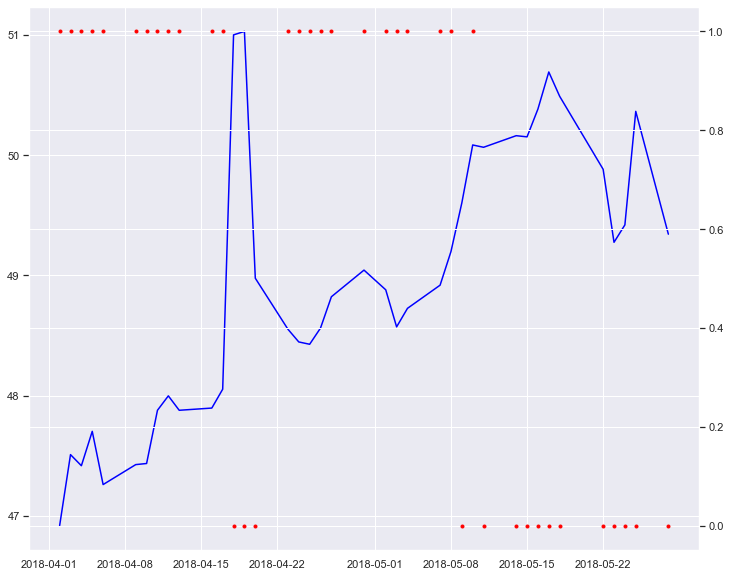

In [14]:
Graph = Graficos(Pipe.Base['2018-04-01':'2018-05-28'])
Graph.TwinTimeSeries(['blue','red'],['','','','',''],[1,1,1,1,1],1,'Adj Close','Target')

### Estrategia SMA

In [15]:
Lag = 20
Pipe.Base = Pipe.PipelineEstrategiaSMA(Lag=Lag,
                                       shiftParaComparar = 20,
                                       NombreEstrategia  = 'EstrategiaSMA')

La Precision de la estrategia EstrategiaSMA20 con respecto al target es de 0.49578211617257173


In [16]:
Pipe.Base.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Target,SMA20,EstrategiaSMA20
Date,,,,,,,,,,
2002-08-29,12.52,12.52,12.45,12.52,8.180023,30480000,0.071885,1,7.907900,0
2002-08-30,12.53,12.53,12.50,12.53,8.186557,4567400,0.037510,1,7.944814,0
2002-09-03,12.53,12.55,12.50,12.53,8.186557,15146500,0.069433,1,7.984996,0
2002-09-04,12.70,12.70,12.55,12.70,8.297627,36101500,-0.027559,0,8.028771,0
2002-09-05,12.70,12.71,12.65,12.70,8.297627,48597800,-0.055118,0,8.064705,0


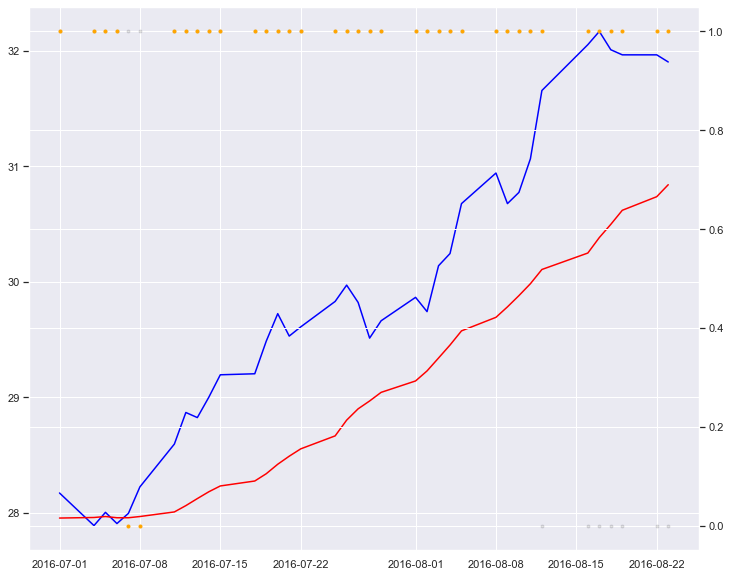

In [17]:
FechaIni = '2016-07-01'
FechaFin = '2016-08-23'
Graph = Graficos(Pipe.Base[FechaIni:FechaFin])
Graph.TwinTimeSeries(['blue','red','black','orange'],['','','','D',''],[1,1,0.1,1,1],2,'Adj Close','SMA'+str(Lag),'Target','EstrategiaSMA'+str(Lag))

In [18]:
FechaIni = '2000-07-01'
FechaFin = '2019-08-23'
GanEst  = Ev.CalcularGananciasTrain(Pipe.Base,'EstrategiaSMA'+str(Lag))[1]
GanEstGan = Ev.CalcularGananciasTrain(Pipe.Base[FechaIni:FechaFin],'EstrategiaSMA'+str(Lag))[0]
print('Ganancias Estrategia SMA {}'.format(np.sum(GanEstGan)))
GanEstGan = Ev.CalcularGananciasTrain(Pipe.Base[FechaIni:FechaFin],'Target')[0]
print('Ganancias Estrategia Target {}'.format(np.sum(GanEstGan)))

Ganancias Estrategia SMA 18.988943099975586
Ganancias Estrategia Target 173.54222583770752


### Estrategia OBV

In [19]:
Pipe.Base = Pipe.PipelineEstrategiaOBV(shiftParaComparar = 10,
                                       NombreEstrategia = 'EstrategiaOBV',
                                       RollMeanOBV = 5,
                                       RollMeanPrice=5)

La Precision de la estrategia EstrategiaOBV con respecto al target es de 0.47529525186792


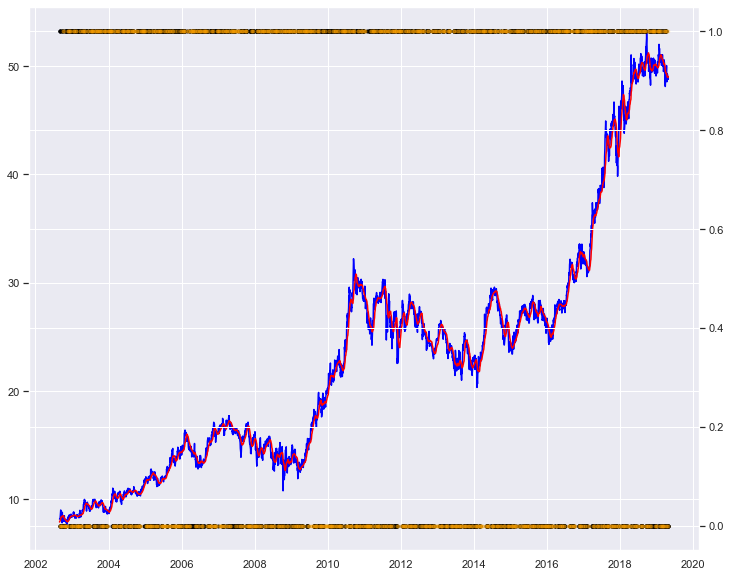

In [20]:
FechaIni = '2000-06-01'
FechaFin = '2019-08-23'
Graph = Graficos(Pipe.Base[FechaIni:FechaFin])
Graph.TwinTimeSeries(['blue','red','black','orange'],['','','','D',''],[1,1,1,0.1,1],2,'Adj Close','SMA'+str(Lag),'Target','EstrategiaOBV')

In [21]:
FechaIni = '2000-06-01'
FechaFin = '2019-08-23'
GanEst  = Ev.CalcularGananciasTrain(Pipe.Base,'EstrategiaOBV')[1]
GanEstGan = Ev.CalcularGananciasTrain(Pipe.Base[FechaIni:FechaFin],'EstrategiaOBV')[0]
print('Ganancias Estrategia OBV {}'.format(np.sum(GanEstGan)))
GanEstGan = Ev.CalcularGananciasTrain(Pipe.Base[FechaIni:FechaFin],'Target')[0]
print('Ganancias Estrategia Target {}'.format(np.sum(GanEstGan)))

Ganancias Estrategia OBV 14.462532997131348
Ganancias Estrategia Target 173.54222583770752


## Estrategia WPR

In [22]:
Pipe.Base = Pipe.PipelineEstrategiaWPR(timeperiodEstrategy = 14,
                                       VectorLimits = [[-80,-50],[-20,-50]],
                                       shiftParaComparar = 20,
                                       NombreEstrategia  = 'EstrategiaWPR')

La Precision de la estrategia EstrategiaWPR con respecto al target es de 0.49023861171366595


In [23]:
Pipe.Base.head(5)

,Open,High,Low,Close,Adj Close,Volume,Return,Target,SMA20,EstrategiaSMA20,AccionEstrategiaSMA20,OBV,OBVROllMean5,Adj Close5,EstrategiaOBV,AccionEstrategiaOBV,WPR,EstrategiaWPR
Date,,,,,,,,,,,,,,,,,,
2002-08-29,12.52,12.52,12.45,12.52,8.180023,30480000,0.071885,1,7.907900,0,-1,30480000.0,NaN,NaN,0,-1,NaN,0
2002-08-30,12.53,12.53,12.50,12.53,8.186557,4567400,0.037510,1,7.944814,0,0,35047400.0,NaN,NaN,0,0,NaN,0
2002-09-03,12.53,12.55,12.50,12.53,8.186557,15146500,0.069433,1,7.984996,0,0,35047400.0,NaN,NaN,0,0,NaN,0
2002-09-04,12.70,12.70,12.55,12.70,8.297627,36101500,-0.027559,0,8.028771,0,0,71148900.0,NaN,NaN,0,0,NaN,0
2002-09-05,12.70,12.71,12.65,12.70,8.297627,48597800,-0.055118,0,8.064705,0,0,71148900.0,48574520.0,8.229678,0,0,NaN,0


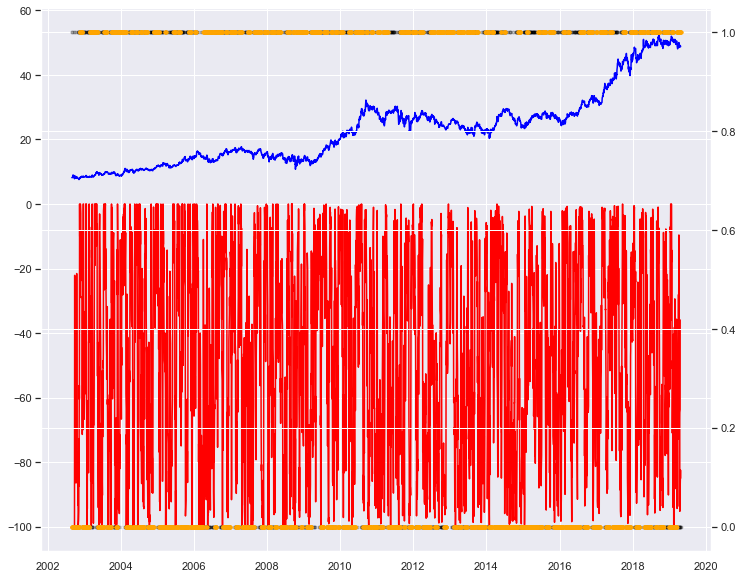

In [24]:
FechaIni = '2000-06-01'
FechaFin = '2019-08-23'
Graph = Graficos(Pipe.Base[FechaIni:FechaFin])
Graph.TwinTimeSeries(['blue','red','black','orange'],['','','','D',''],[1,1,0.1,1,1],2,'Adj Close','WPR','Target','EstrategiaWPR')

In [25]:
FechaIni = '2000-06-01'
FechaFin = '2019-08-23'
GanEst  = Ev.CalcularGananciasTrain(Pipe.Base,'EstrategiaWPR')[1]
GanEstGan = Ev.CalcularGananciasTrain(Pipe.Base[FechaIni:FechaFin],'EstrategiaWPR')[0]
print('Ganancias Estrategia WPR {}'.format(np.sum(GanEstGan)))
GanEstGan = Ev.CalcularGananciasTrain(Pipe.Base[FechaIni:FechaFin],'Target')[0]
print('Ganancias Estrategia Target {}'.format(np.sum(GanEstGan)))

Ganancias Estrategia WPR 15.540900230407715
Ganancias Estrategia Target 173.54222583770752


### Estrategia ROC

In [26]:
Pipe.Base = Pipe.PipelineEstrategiaROC(timeperiod=14,
                                       shiftParaComparar = 5,
                                       ParametroReturn = 4,
                                       NombreEstrategia  = 'EstrategiaROC')

La Precision de la estrategia EstrategiaROC con respecto al target es de 0.49891540130151846


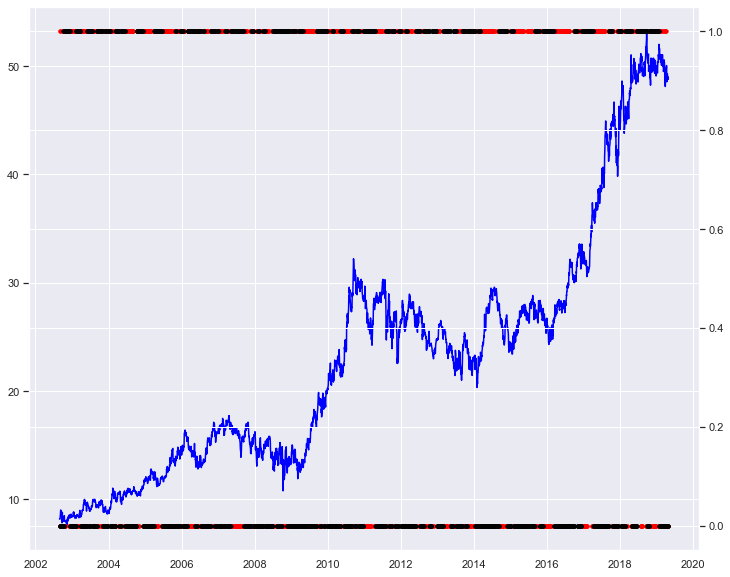

In [27]:
FechaIni = '2000-06-01'
FechaFin = '2019-08-23'
Graph = Graficos(Pipe.Base[FechaIni:FechaFin])
Graph.TwinTimeSeries(['blue','red','black','orange'],['','','','D',''],[1,1,1,1,1],1,'Adj Close','Target','EstrategiaROC')

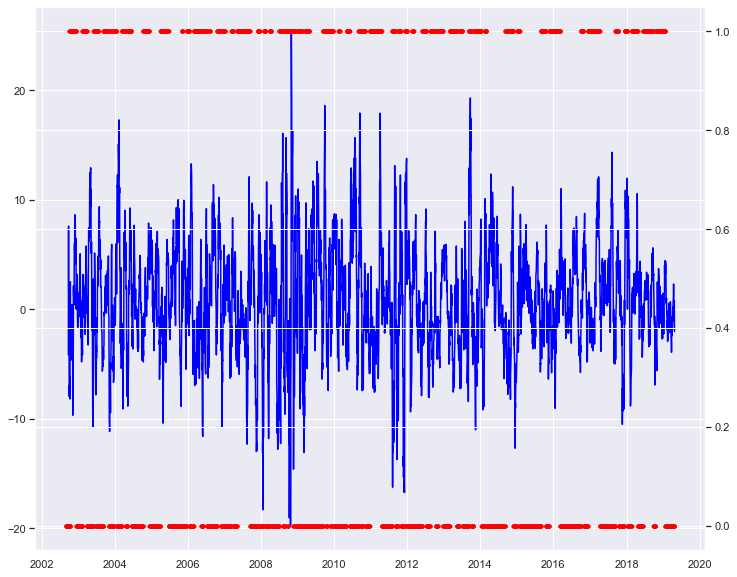

In [28]:
FechaIni = '2000-06-01'
FechaFin = '2019-08-23'
Graph = Graficos(Pipe.Base[FechaIni:FechaFin])
Graph.TwinTimeSeries(['blue','red','black','orange'],['','','','D',''],[1,1,1,1,1],1,'ROC','EstrategiaROC')

In [29]:
FechaIni = '2000-06-01'
FechaFin = '2019-08-23'
GanEst  = Ev.CalcularGananciasTrain(Pipe.Base,'EstrategiaROC')[1]
GanEstGan = Ev.CalcularGananciasTrain(Pipe.Base[FechaIni:FechaFin],'EstrategiaROC')[0]
print('Ganancias Estrategia ROC {}'.format(np.sum(GanEstGan)))
GanEstGan = Ev.CalcularGananciasTrain(Pipe.Base[FechaIni:FechaFin],'Target')[0]
print('Ganancias Estrategia Target {}'.format(np.sum(GanEstGan)))

Ganancias Estrategia ROC 16.539077758789062
Ganancias Estrategia Target 173.54222583770752


### Estrategia EMA

In [30]:
Pipe.Base = Pipe.PipelineEstrategiaEMA(Lags=[5,30],
                                       shiftParaComparar = 20,
                                       NombreEstrategia  = 'EstrategiaEMA')

La Precision de la estrategia EstrategiaEMA con respecto al target es de 0.49168474331164136


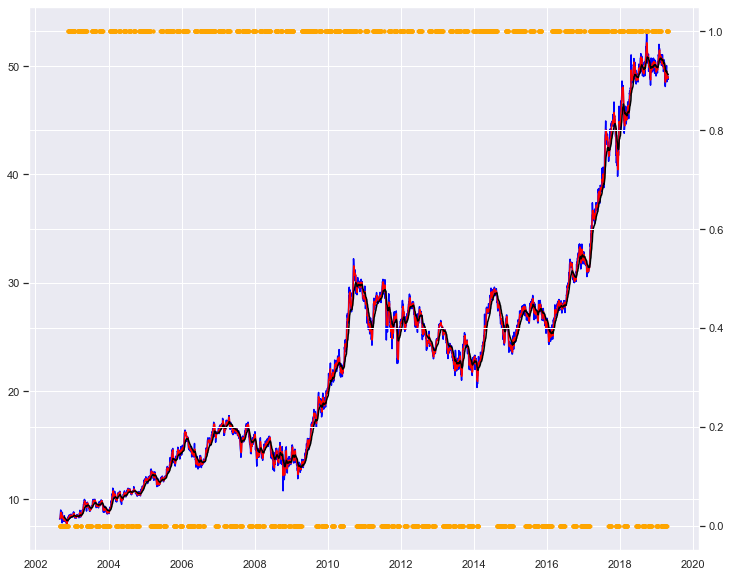

In [31]:
Lags = [5,30]
FechaIni = '2000-06-01'
FechaFin = '2019-08-23'
Graph = Graficos(Pipe.Base[FechaIni:FechaFin])
Graph.TwinTimeSeries(['blue','red','black','orange'],['','','','D',''],[1,1,1,1,1],3,'Adj Close','EMA'+str(Lags[0]),'EMA'+str(Lags[1]),'EstrategiaEMA')

In [32]:
FechaIni = '2000-06-01'
FechaFin = '2019-08-23'
GanEst  = Ev.CalcularGananciasTrain(Pipe.Base,'EstrategiaEMA')[1]
GanEstGan = Ev.CalcularGananciasTrain(Pipe.Base[FechaIni:FechaFin],'EstrategiaEMA')[0]
print('Ganancias Estrategia EMA {}'.format(np.sum(GanEstGan)))
GanEstGan = Ev.CalcularGananciasTrain(Pipe.Base[FechaIni:FechaFin],'Target')[0]
print('Ganancias Estrategia Target {}'.format(np.sum(GanEstGan)))

Ganancias Estrategia EMA 19.74114227294922
Ganancias Estrategia Target 173.54222583770752


## Modelo

In [33]:
VariablesX = ['EstrategiaSMA20','EstrategiaOBV','EstrategiaWPR',
              'EstrategiaROC','EstrategiaEMA']
VariablesY = ['Target']
BaseMod = Pipe.Base[VariablesX+VariablesY]
RFCls = RandomForestModel(BaseMod,10,20,110,True)
modelCls = RFCls.Fit(BaseMod[VariablesX]
                     ,BaseMod['Target'])
BestParams=RFCls.GridSearch(np.array(BaseMod[VariablesX])
                            ,np.array(BaseMod['Target']).ravel(),
                            {'max_depth':[20,30],
                            'n_estimators':[10,20,30,40,50,60,70,80,90,100]})
print(BestParams)
tscv = TimeSeriesSplit(n_splits=10)
RFCls = RandomForestModel(BaseMod,BestParams['n_estimators'],BestParams['max_depth'],110,True)
modelCls = RFCls.Fit(BaseMod[VariablesX]
                     ,BaseMod['Target'])
Resultados = RFCls.CV(['accuracy','f1_weighted'],BaseMod[VariablesX].values,
         np.array(BaseMod['Target']).ravel(),cv=tscv,return_train_score=False)
print(Resultados)
feature_importances = pd.DataFrame(modelCls.feature_importances_,index = BaseMod[VariablesX].columns,
                                   columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)
Resultados['test_accuracy'].mean()
PredTrain = modelCls.predict(Pipe.Base[VariablesX])
Pipe.Base['PredTrain'] = PredTrain

{'max_depth': 20, 'n_estimators': 20}
{'fit_time': array([0.04895854, 0.05704665, 0.0358696 , 0.02442813, 0.02666092,
       0.03165412, 0.05246472, 0.06058884, 0.03098226, 0.06376171]), 'score_time': array([0.01230216, 0.00898862, 0.00566077, 0.00523353, 0.00716209,
       0.00443506, 0.01202631, 0.00948215, 0.01193404, 0.00598407]), 'test_accuracy': array([0.5198939 , 0.52254642, 0.5464191 , 0.5331565 , 0.49071618,
       0.49602122, 0.4801061 , 0.4535809 , 0.5994695 , 0.45623342]), 'test_f1_weighted': array([0.51735037, 0.49954491, 0.51380689, 0.49371568, 0.45642473,
       0.4418486 , 0.46491312, 0.45574075, 0.60331995, 0.45577245])}
                 importance
EstrategiaWPR      0.248096
EstrategiaROC      0.205590
EstrategiaOBV      0.203834
EstrategiaEMA      0.175958
EstrategiaSMA20    0.166522


In [34]:
GanEstGan = Ev.CalcularGananciasTrain(Pipe.Base[FechaIni:FechaFin],'PredTrain')[0]
print('Ganancias Estrategia Prediction {}'.format(np.sum(GanEstGan)))
GanEstGan = Ev.CalcularGananciasTrain(Pipe.Base[FechaIni:FechaFin],'Target')[0]
print('Ganancias Estrategia Target {}'.format(np.sum(GanEstGan)))

Ganancias Estrategia Prediction 28.223456382751465
Ganancias Estrategia Target 173.54222583770752


In [35]:
BaseTest = pd.DataFrame()
Dates = pd.date_range(start='2019-06-14', end='2020-03-12')
for i in Dates:
    enddate = i
    startdate = enddate-timedelta(days=160)
    Base = Datos.GetDataFromYahoo(Ticker='BSANTANDER.SN',start=str(startdate)[0:10],
                                  end=str(enddate)[0:10],interval='1d')
    Est = PreParacionDatosModelo(Base)
    Pipe = Pipelines(Base)
    Ev = CalcularRetornos()
    Pipe.Base = Est.TargetPrice(-10,[0],10,False,'Adj Close')
    Pipe.Base = Pipe.PipelineEstrategiaSMA(Lag=20,
                                           shiftParaComparar = 20,
                                           NombreEstrategia  = 'EstrategiaSMA')
    Pipe.Base = Pipe.PipelineEstrategiaOBV(shiftParaComparar = 10,
                                           NombreEstrategia = 'EstrategiaOBV',
                                           RollMeanOBV = 5,
                                           RollMeanPrice = 5)
    Pipe.Base = Pipe.PipelineEstrategiaWPR(timeperiodEstrategy = 14,
                                           VectorLimits = [[-80,-50],[-20,-50]],
                                           shiftParaComparar = 20,
                                           NombreEstrategia  = 'EstrategiaWPR')
    Pipe.Base = Pipe.PipelineEstrategiaROC(timeperiod=14,
                                           shiftParaComparar = 5,
                                           ParametroReturn = 4,
                                           NombreEstrategia  = 'EstrategiaROC')
    Pipe.Base = Pipe.PipelineEstrategiaEMA(Lags=[5,30],
                                           shiftParaComparar = 20,
                                           NombreEstrategia  = 'EstrategiaEMA')
    
    Pred = modelCls.predict(Pipe.Base[VariablesX])
    BaseTestTemp = pd.DataFrame(Pipe.Base.iloc[-1]).transpose()
    BaseTestTemp['Prediction'] = Pred[len(Pred)-1]
    BaseTest = pd.concat([BaseTest,BaseTestTemp])
    
    
#     Pipe.Base = Pipe.PipelineEstrategiaWPR(timeperiodEstrategy = 14,
#                                        VectorLimits = [[-70,-50],[-20,-50]],
#                                        shiftParaComparar =10,
#                                        NombreEstrategia  = 'EstrategiaWPR',
#                                        TargetDaysLookAhead=-5,
#                                        LimitReturn=0,
#                                        RollingMeanDays=10,
#                                        TickerTarget='Adj Close')
#     Pipe.Base = Pipe.PipelineEstrategiaSMA(Lag=30,
#                                            shiftParaComparar = 10,
#                                            NombreEstrategia  = 'EstrategiaSMA')

#     Pipe.Base = Pipe.PipelineEstrategiaEMA(Lags=[5,21],
#                                            shiftParaComparar = 10,
#                                            NombreEstrategia  = 'EstrategiaEMA')
# #     Pipe.Base = Pipe.PipelineEstrategiaRSI(timeperiodEstrategy=14,
# #                                            shiftParaComparar = 5,
# #                                            NombreEstrategia  = 'EstrategiaRSI')
#     Pipe.Base = Pipe.PipelineEstrategiaSar(acceleration = 0.02,
#                                            maximum = 0.2,
#                                            shiftParaComparar = 10,
#                                            NombreEstrategia  = 'EstrategiaSAR')
#     Pipe.Base = Pipe.PipelineEstrategiaROC(timeperiod=14,
#                                            shiftParaComparar = 10,
#                                            NombreEstrategia  = 'EstrategiaROC')
#     Pipe.Base = Pipe.PipelineEstrategiaBB(timeperiod=14,
#                                           nbdevup = 1.6,
#                                           nbdevdn = 1.6,
#                                           shiftParaComparar = 10,
#                                           NombreEstrategia  = 'EstrategiaBB')
#     Pipe.Base = Pipe.PipelineEstrategiaCCI(timeperiod=20,
#                                           shiftParaComparar = 10,
#                                           NombreEstrategia  = 'EstrategiaCCI')
#     Pipe.Base = Pipe.PipelineEstrategiaMACD(fastperiod=12,
#                                             slowperiod = 26,
#                                             signalperiod = 9,
#                                             shiftParaComparar = 10,
#                                             NombreEstrategia  = 'EstrategiaMACD')
#     Pipe.Base = Pipe.PipelineEstrategiaSTOCH(fastk_period = 14,
#                                             slowk_period = 3,
#                                             slowd_period = 3,
#                                             shiftParaComparar = 10,
#                                             NombreEstrategia  = 'EstrategiaSTOCH')
#     Pipe.Base = Pipe.PipelineEstrategiaADX(timeperiod=14,
#                                             shiftParaComparar = 1,
#                                             NombreEstrategia  = 'EstrategiaADX')
#     Pipe.Base = Pipe.PipelineEstrategiaOBV(shiftParaComparar = 10,
#                                        NombreEstrategia = 'EstrategiaOBV',
#                                        RollMeanOBV = 3,
#                                        RollMeanPrice=3)
#     Pred = modelCls.predict(Pipe.Base[VariablesX])
#     BaseTestTemp = pd.DataFrame(Pipe.Base.iloc[-1]).transpose()
#     BaseTestTemp['Prediction'] = Pred[len(Pred)-1]
#     BaseTest = pd.concat([BaseTest,BaseTestTemp])
    

[*********************100%***********************]  1 of 1 completed
La Precision de la estrategia EstrategiaSMA20 con respecto al target es de 0.573170731707317
La Precision de la estrategia EstrategiaOBV con respecto al target es de 0.5609756097560976
La Precision de la estrategia EstrategiaWPR con respecto al target es de 0.5609756097560976
La Precision de la estrategia EstrategiaROC con respecto al target es de 0.6341463414634146
La Precision de la estrategia EstrategiaEMA con respecto al target es de 0.6341463414634146
[*********************100%***********************]  1 of 1 completed
La Precision de la estrategia EstrategiaSMA20 con respecto al target es de 0.5783132530120482
La Precision de la estrategia EstrategiaOBV con respecto al target es de 0.5542168674698795
La Precision de la estrategia EstrategiaWPR con respecto al target es de 0.5662650602409639
La Precision de la estrategia EstrategiaROC con respecto al target es de 0.6265060240963856
La Precision de la estrategia E

In [36]:
BaseTest.describe()

,Open,High,Low,Close,Adj Close,Volume,Return,Target,SMA20,EstrategiaSMA20,...,Adj Close5,EstrategiaOBV,WPR,EstrategiaWPR,ROC,EstrategiaROC,EMA5,EMA30,EstrategiaEMA,Prediction
count,273.000000,273.000000,273.000000,273.000000,273.000000,2.730000e+02,273.000000,273.000000,273.000000,273.000000,...,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,47.581685,48.182674,47.108791,47.581685,47.581685,1.816076e+07,-0.015825,0.439560,48.015238,0.439560,...,47.641289,0.483516,-49.189429,0.479853,-1.499103,0.336996,47.651575,48.181680,0.461538,0.783883
std,4.215481,4.040481,4.256258,4.215481,4.215481,2.373412e+07,0.044513,0.497245,3.501229,0.497245,...,4.048618,0.500646,29.199534,0.500511,4.606538,0.473552,4.029159,3.181872,0.499434,0.412351
min,36.770000,37.490002,36.770000,36.770000,36.770000,5.999280e+05,-0.129281,0.000000,39.253500,0.000000,...,37.520000,0.000000,-100.000000,0.000000,-16.448920,0.000000,37.490379,39.990948,0.000000,0.000000
25%,44.200001,45.279999,43.599998,44.200001,44.200001,6.803309e+06,-0.038552,0.000000,44.662000,0.000000,...,44.212000,0.000000,-72.592718,0.000000,-3.300114,0.000000,44.165872,45.181019,0.000000,1.000000
50%,49.950001,50.400002,49.310001,49.950001,49.950001,1.277139e+07,-0.007000,0.000000,50.106000,0.000000,...,50.022000,0.000000,-50.370379,0.000000,-0.530766,0.000000,50.097711,49.927028,0.000000,1.000000
75%,51.000000,51.389999,50.709999,51.000000,51.000000,1.999501e+07,0.015049,1.000000,50.893000,1.000000,...,51.010000,1.000000,-23.076923,1.000000,1.286615,1.000000,51.007302,50.693204,1.000000,1.000000
max,52.209999,52.500000,51.980000,52.209999,52.209999,1.698292e+08,0.072593,1.000000,51.479000,1.000000,...,51.824000,1.000000,-0.000000,1.000000,7.087157,1.000000,51.853614,51.365965,1.000000,1.000000


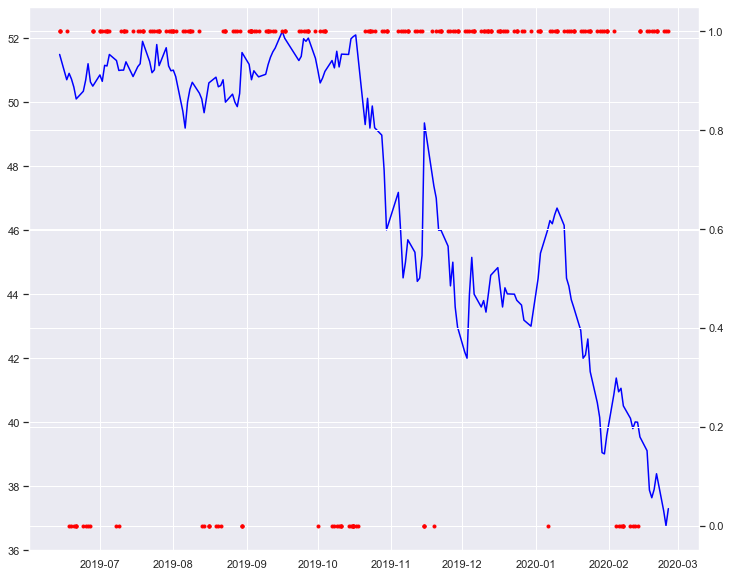

In [40]:
Graph = Graficos(BaseTest['2019-06-14':'2020-03-12'])
Graph.TwinTimeSeries(['blue','red','black','black','orange'],['','','','',''],[1,1,1,1,1],1,'Adj Close','Prediction')

In [41]:
np.sum(Ev.CalcularGananciasTrain(BaseTest,'Prediction')[0])

-3.0999984741210938

In [106]:
# Pipe.Base = Pipe.PipelineEstrategiaWPR(timeperiodEstrategy = 14,
#                                        VectorLimits = [[-70,-50],[-20,-50]],
#                                        shiftParaComparar =10,
#                                        NombreEstrategia  = 'EstrategiaWPR',
#                                        TargetDaysLookAhead=-5,
#                                        LimitReturn=0,
#                                        RollingMeanDays=10,
#                                        TickerTarget='Adj Close')
# Pipe.Base = Pipe.PipelineEstrategiaSMA(Lag=30,
#                                        shiftParaComparar = 10,
#                                        NombreEstrategia  = 'EstrategiaSMA')

# Pipe.Base = Pipe.PipelineEstrategiaEMA(Lags=[5,21],
#                                        shiftParaComparar = 10,
#                                        NombreEstrategia  = 'EstrategiaEMA')
# Pipe.Base = Pipe.PipelineEstrategiaRSI(timeperiodEstrategy=14,
#                                        shiftParaComparar = 5,
#                                        NombreEstrategia  = 'EstrategiaRSI')
# Pipe.Base = Pipe.PipelineEstrategiaSar(acceleration = 0.02,
#                                        maximum = 0.2,
#                                        shiftParaComparar = 10,
#                                        NombreEstrategia  = 'EstrategiaSAR')
# Pipe.Base = Pipe.PipelineEstrategiaROC(timeperiod=14,
#                                        shiftParaComparar = 10,
#                                        NombreEstrategia  = 'EstrategiaROC')
# Pipe.Base = Pipe.PipelineEstrategiaBB(timeperiod=14,
#                                       nbdevup = 1.6,
#                                       nbdevdn = 1.6,
#                                       shiftParaComparar = 10,
#                                       NombreEstrategia  = 'EstrategiaBB')
# Pipe.Base = Pipe.PipelineEstrategiaCCI(timeperiod=20,
#                                       shiftParaComparar = 10,
#                                       NombreEstrategia  = 'EstrategiaCCI')
# Pipe.Base = Pipe.PipelineEstrategiaMACD(fastperiod=12,
#                                         slowperiod = 26,
#                                         signalperiod = 9,
#                                         shiftParaComparar = 10,
#                                         NombreEstrategia  = 'EstrategiaMACD')
# Pipe.Base = Pipe.PipelineEstrategiaSTOCH(fastk_period = 14,
#                                         slowk_period = 3,
#                                         slowd_period = 3,
#                                         shiftParaComparar = 10,
#                                         NombreEstrategia  = 'EstrategiaSTOCH')
# Pipe.Base = Pipe.PipelineEstrategiaADX(timeperiod=14,
#                                         shiftParaComparar = 1,
#                                         NombreEstrategia  = 'EstrategiaADX')
# Pipe.Base = Pipe.PipelineEstrategiaOBV(shiftParaComparar = 10,
#                                        NombreEstrategia = 'EstrategiaOBV',
#                                        RollMeanOBV = 3,
#                                        RollMeanPrice=3)

La Precision de la estrategia EstrategiaSMA30 con respecto al target es de 0.5179809358752167


##### 